<a href="https://colab.research.google.com/github/gamer-217/ML/blob/main/11%EA%B3%BC_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81_%EC%A3%BC%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11.2  인위적 데이터를 k-means 알고리즘으로 클러스터링하기

In [ ]:
# 필요한 라이브러리 임포트
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp


In [ ]:
# 무작위 데이터 포인트 생성, 세 개의 중심을 가진 클러스터
data, cls = make_blobs(n_samples=100, centers=3, n_features=2, random_state=9)


In [ ]:
# 생성된 데이터 포인트를 pandas 데이터프레임으로 변환
points = pd.DataFrame(data, cls)
points.columns = ['d1', 'd2']


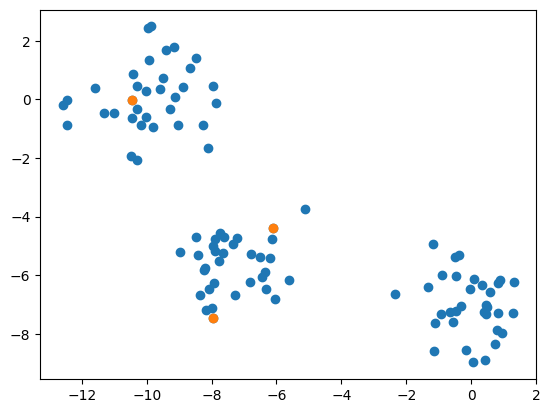

In [ ]:
# 데이터 프레임에서 임의의 3개의 포인트를 초기 중심으로 샘플링
centroids = points.sample(3, random_state=9)

# 데이터 포인트와 초기 중심을 시각화
plt.scatter(points['d1'], points['d2'])
plt.scatter(centroids['d1'], centroids['d2'])
plt.show()



In [ ]:
# 각 점과 중심 간의 유클리드 거리 계산
dist = sp.spatial.distance.cdist(points, centroids, "euclidean")
dist[0:5, :]  # 거리 행렬의 처음 5개 행 확인


array([[ 8.44129256,  7.09945613, 13.01092866],
       [ 7.97443076,  7.27770047,  2.190288  ],
       [ 0.88300842,  3.1948764 ,  6.96682744],
       [ 2.81163891,  2.40967548,  5.06958482],
       [ 7.48674916,  5.83218597,  0.35884682]])

In [ ]:
# 각 점에서 가장 가까운 중심의 인덱스를 찾음
cidx = np.argmin(dist, axis=1)
cidx


array([1, 2, 0, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1, 2, 0, 1, 1, 2, 2, 0, 2, 1, 2,
       1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2,
       1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2])

In [ ]:
# 가장 가까운 중심의 인덱스를 클러스터 레이블로 추가
points["cluster"] = np.array(cidx)
points.head()


,d1,d2,cluster
1,0.476743,-7.083684,1
0,-12.464627,-0.875787,2
2,-8.342720,-6.659578,0
2,-8.483402,-4.691798,1
0,-10.286264,-0.338606,2


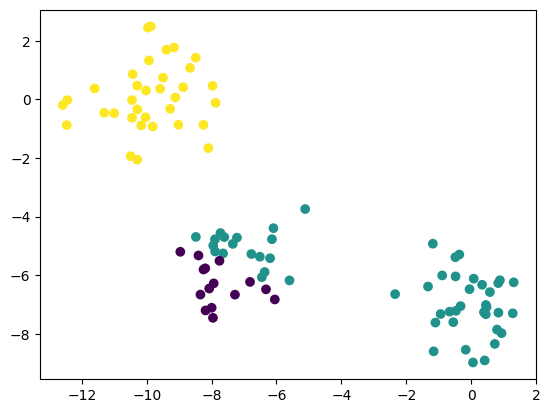

In [ ]:
# 클러스터 레이블에 따라 데이터 포인트를 색상으로 구분하여 시각화
plt.scatter(points["d1"], points["d2"], c=points["cluster"])
plt.show()


In [ ]:
# 각 클러스터의 새로운 중심을 계산 (평균)
centroids2 = points.groupby("cluster").mean()
centroids2

,d1,d2
cluster,,
0,-7.767971,-6.329341
1,-2.482664,-6.318129
2,-9.916951,0.092368


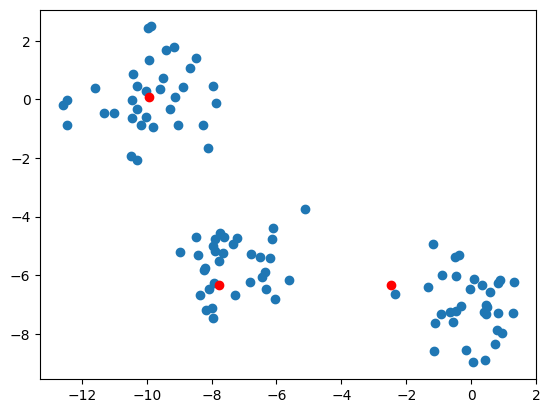

In [ ]:
# 데이터 포인트와 새로운 중심을 시각화 (중심은 빨간색)
plt.scatter(points["d1"], points["d2"])
plt.scatter(centroids2["d1"], centroids2["d2"], c="red")
plt.show()


11.3  아이리스 데이터를 k-means 알고리즘으로 클러스터링하기

In [ ]:
# 파일 업로드를 위한 모듈 임포트 (Google Colab 사용 시)
from google.colab import files
uploaded = files.upload()

# 현재 디렉토리의 파일 목록 확인
import os
os.listdir()


Saving iris.csv to iris.csv


['.config', 'iris.csv', 'sample_data']

In [ ]:
# csv 파일을 처리하는 모듈 임포트
import csv
f = open('iris.csv')  # iris.csv 파일 열기
data = csv.reader(f)  # 파일 내용을 읽어서 data에 저장
ilist = []

In [ ]:
# 파일 내용을 ilist에 저장하고 출력
for row in data:
    ilist.append(row)
    print(row)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
['5.1', '3.5', '1.4', '0.2', 'Iris-setosa']
['4.9', '3', '1.4', '0.2', 'Iris-setosa']
['4.7', '3.2', '1.3', '0.2', 'Iris-setosa']
['4.6', '3.1', '1.5', '0.2', 'Iris-setosa']
['5', '3.6', '1.4', '0.2', 'Iris-setosa']
['5.4', '3.9', '1.7', '0.4', 'Iris-setosa']
['4.6', '3.4', '1.4', '0.3', 'Iris-setosa']
['5', '3.4', '1.5', '0.2', 'Iris-setosa']
['4.4', '2.9', '1.4', '0.2', 'Iris-setosa']
['4.9', '3.1', '1.5', '0.1', 'Iris-setosa']
['5.4', '3.7', '1.5', '0.2', 'Iris-setosa']
['4.8', '3.4', '1.6', '0.2', 'Iris-setosa']
['4.8', '3', '1.4', '0.1', 'Iris-setosa']
['4.3', '3', '1.1', '0.1', 'Iris-setosa']
['5.8', '4', '1.2', '0.2', 'Iris-setosa']
['5.7', '4.4', '1.5', '0.4', 'Iris-setosa']
['5.4', '3.9', '1.3', '0.4', 'Iris-setosa']
['5.1', '3.5', '1.4', '0.3', 'Iris-setosa']
['5.7', '3.8', '1.7', '0.3', 'Iris-setosa']
['5.1', '3.8', '1.5', '0.3', 'Iris-setosa']
['5.4', '3.4', '1.7', '0.2', 'Iris-setosa']
['5.1', '3.7',

In [ ]:
# KMeans 클러스터링을 위한 라이브러리 임포트
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
iris = load_iris()  # 아이리스 데이터셋 로드
km = KMeans(n_clusters=3)  # KMeans 모델 생성 (클러스터 수: 3)
km.fit(iris.data)  # 모델 학습
labels = km.predict(iris.data)  # 데이터 포인트의 클러스터 레이블 예측
labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [ ]:
# setosa 종류의 정확도와 오류를 계산
correct, incorrect = 0, 0
for i in range(0, 50):
    if labels[i] == 0:  # setosa 종류는 label이 0
        correct += 1
    else:
         incorrect += 1

print("setosa \t correct:", correct, " incorrect:", incorrect)


setosa 	 correct: 50  incorrect: 0


In [ ]:
# versicolor 종류의 정확도와 오류를 계산
correct, incorrect = 0, 0
for i in range(50, 100):
    if labels[i] == 1:  # versicolor 종류는 label이 1
         correct += 1
    else:
         incorrect += 1
print("versicolor \t correct:", correct, " incorrect:", incorrect)


versicolor 	 correct: 48  incorrect: 2


In [ ]:
# virginica 종류의 정확도와 오류를 계산
correct, incorrect = 0, 0
for i in range(100, 150):
    if labels[i] == 2:  # virginica 종류는 label이 2
        correct += 1
    else:
        incorrect += 1
print("virginica \t correct:", correct, " incorrect:", incorrect)


virginica 	 correct: 36  incorrect: 14


In [ ]:
# 아이리스 데이터셋을 로드하고 훈련 및 테스트 세트로 나누기
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
iris = load_iris()
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, train_size=0.8)
X_train.shape  # 훈련 세트의 형태 확인


(120, 4)

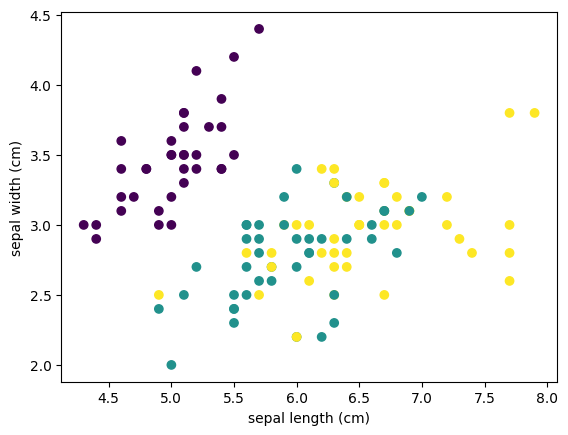

In [ ]:
# 훈련 데이터의 첫 두 특성을 사용하여 산점도 그리기
import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

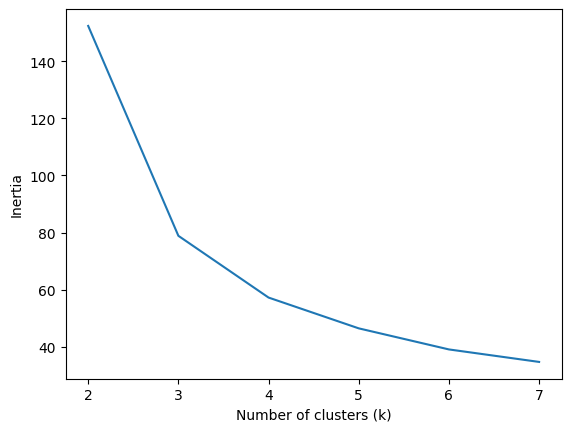

In [ ]:
# 클러스터 수에 따른 관성(inertia) 값을 저장할 리스트 초기화
inertia = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=15)  # KMeans 모델 생성
    km.fit(iris.data)  # 모델 학습
    inertia.append(km.inertia_)  # 각 클러스터 수에 대한 관성 값을 리스트에 추가

# 클러스터 수에 따른 관성의 변화를 시각화
plt.plot(range(2, 8), inertia)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()